# Лабораторная работа № 1

## Подготовка среды

In [1]:
# !pip install category_encoders

In [2]:
import math
# import os
import warnings

# from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.tools import add_constant
# from category_encoders import TargetEncoder
# from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
# from sklearn import preprocessing
# from sklearn.cluster import KMeans
# from sklearn.ensemble import (ExtraTreesRegressor,
#                               GradientBoostingRegressor,
#                               RandomForestRegressor)
# from sklearn.isotonic import IsotonicRegression
# from sklearn.linear_model import (ElasticNetCV,
#                                   Lasso, LassoCV,
#                                   LinearRegression,
#                                   Ridge,
#                                   RidgeCV)
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import (LabelEncoder,
#                                    MinMaxScaler,
#                                    Normalizer,
#                                    RobustScaler,
#                                    StandardScaler)
# from sklearn.svm import SVR
# from IPython.display import display
# from ipywidgets import Button, Dropdown, FloatSlider, Layout, RadioButtons

%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
# drive.mount('/content/drive')

In [4]:
# Подгружаем данные
df = pd.read_csv('/Users/oudzhi/PycharmProjects/BigData_Prediction/Lab_1/cars.csv', encoding='latin-1')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000.0,1.0,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0.0,39576.0,2016-04-06 00:46:52;;;;;;;;
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000.0,3.0,benzin,smart,nein,2016-03-05 00:00:00,0.0,26135.0,2016-03-11 18:17:12;;;;;;;;
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000.0,3.0,diesel,volkswagen,nein,2016-03-19 00:00:00,0.0,87439.0,2016-04-07 07:15:26;;;;;;;;
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000.0,6.0,diesel,volkswagen,NaN,2016-03-20 00:00:00,0.0,40764.0,2016-03-24 12:45:21;;;;;;;;


In [5]:
# Переводит все имена столбцов в нижний регистр + замена пробелов на "_"
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000.0,1.0,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0.0,39576.0,2016-04-06 00:46:52;;;;;;;;
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000.0,3.0,benzin,smart,nein,2016-03-05 00:00:00,0.0,26135.0,2016-03-11 18:17:12;;;;;;;;
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000.0,3.0,diesel,volkswagen,nein,2016-03-19 00:00:00,0.0,87439.0,2016-04-07 07:15:26;;;;;;;;
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000.0,6.0,diesel,volkswagen,NaN,2016-03-20 00:00:00,0.0,40764.0,2016-03-24 12:45:21;;;;;;;;


In [7]:
df.dtypes

datecrawled             object
name                    object
seller                  object
offertype               object
price                   object
abtest                  object
vehicletype             object
yearofregistration      object
gearbox                 object
powerps                 object
model                   object
kilometer              float64
monthofregistration     object
fueltype                object
brand                   object
notrepaireddamage       object
datecreated             object
nrofpictures           float64
postalcode              object
lastseen;;;;;;;;        object
dtype: object

## Обработка данных

In [8]:
# Удаляем столбцы: "datecrawled", "lastseen;;;;;;;;", "datecreated", "name"
# Заметил, что поле name не стандартизировано, кроме того, значения дублируются полями model и brand.
columns_to_drop = ["datecrawled", "lastseen;;;;;;;;", "datecreated", "name"]
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.dtypes

seller                  object
offertype               object
price                   object
abtest                  object
vehicletype             object
yearofregistration      object
gearbox                 object
powerps                 object
model                   object
kilometer              float64
monthofregistration     object
fueltype                object
brand                   object
notrepaireddamage       object
nrofpictures           float64
postalcode              object
dtype: object

Видим следующую картину: kilometer, price, yearofregistration, powerps не идентифицированы как числовые объекты.

In [10]:
def get_cols(df) -> list:
    """
    Функция возвращает список категориальных и числовых переменных.
    """
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

In [11]:
# Получение списков числовых и категориальных колонок с использованием ранее определенной функции get_cols():
numbers_cols, categorical_cols = get_cols(df)

In [12]:
df[numbers_cols].apply(lambda x: x.isna().sum())

kilometer       2613
nrofpictures    2613
dtype: int64

In [13]:
# Заменить пропущенные значения в колонках "kilometer" и "nrofpictures" на 0
df['kilometer'].fillna(0, inplace=True)
df['nrofpictures'].fillna(0, inplace=True)

In [14]:
df[numbers_cols].apply(lambda x: x.isna().sum())

kilometer       0
nrofpictures    0
dtype: int64

In [15]:
# kilometer, price, yearofregistration, monthofregistration, powerps, postalcode- меняем тип данных на числовой
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['yearofregistration'] = pd.to_numeric(df['yearofregistration'], errors='coerce')
df['monthofregistration'] = pd.to_numeric(df['monthofregistration'], errors='coerce')
df['kilometer'] = pd.to_numeric(df['kilometer'], errors='coerce')
df['powerps'] = pd.to_numeric(df['powerps'], errors='coerce')
df['postalcode'] = pd.to_numeric(df['postalcode'], errors='coerce')

In [16]:
df.dtypes

seller                  object
offertype               object
price                  float64
abtest                  object
vehicletype             object
yearofregistration     float64
gearbox                 object
powerps                float64
model                   object
kilometer              float64
monthofregistration    float64
fueltype                object
brand                   object
notrepaireddamage       object
nrofpictures           float64
postalcode             float64
dtype: object

In [17]:
# yearofregistration логичнее было бы преобразовать в столбец = [2024 - yearofregistration]

df['yearofregistration'] = 2024 - df.yearofregistration

In [18]:
df.head(20)

,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,nrofpictures,postalcode
0,privat,Angebot,480.0,test,NaN,31.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,0.0,70435.0
1,privat,Angebot,18300.0,test,coupe,13.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,0.0,66954.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,privat,Angebot,1500.0,test,kleinwagen,23.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,0.0,91074.0
4,privat,Angebot,3600.0,test,kleinwagen,16.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,0.0,60437.0
5,privat,Angebot,650.0,test,limousine,29.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,0.0,33775.0
6,privat,Angebot,2200.0,test,cabrio,20.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein,0.0,67112.0
7,privat,Angebot,0.0,test,limousine,44.0,manuell,50.0,andere,40000.0,7.0,benzin,volkswagen,nein,0.0,19348.0
8,privat,Angebot,14500.0,control,bus,10.0,manuell,125.0,c_max,30000.0,8.0,benzin,ford,NaN,0.0,94505.0
9,privat,Angebot,999.0,test,kleinwagen,26.0,manuell,101.0,golf,150000.0,0.0,NaN,volkswagen,NaN,0.0,27472.0


## Описательная статистика

In [19]:
df.describe()

,price,yearofregistration,powerps,kilometer,monthofregistration,nrofpictures,postalcode
count,3.692050e+05,369205.000000,369205.000000,371824.000000,369205.000000,371824.000000,369205.000000
mean,1.730462e+04,19.423502,115.370843,124827.579809,5.733834,0.761933,50817.689476
std,3.599177e+06,93.148737,192.595094,41265.377992,3.713998,192.522609,25802.663966
min,0.000000e+00,-7975.000000,0.000000,0.000000,0.000000,0.000000,1067.000000
25%,1.150000e+03,16.000000,69.000000,100000.000000,3.000000,0.000000,30457.000000
50%,2.950000e+03,21.000000,105.000000,150000.000000,6.000000,0.000000,49610.000000
75%,7.100000e+03,25.000000,150.000000,150000.000000,9.000000,0.000000,71549.000000
max,2.147484e+09,1024.000000,20000.000000,150000.000000,12.000000,59457.000000,99998.000000


видим аномалию минимального значения по году регистрации. Избавляемся от этой строки

In [20]:
# Удалить строки, в которых значение в колонке "yearofregistration" меньше 0
df = df[df['yearofregistration'] >= 0]

Проверяем:

In [21]:
df.describe()

,price,yearofregistration,powerps,kilometer,monthofregistration,nrofpictures,postalcode
count,3.690910e+05,369091.000000,369091.000000,369091.000000,369091.000000,369091.0,369091.000000
mean,1.730535e+04,20.812770,115.372369,125748.812623,5.735152,0.0,50819.593894
std,3.599733e+06,14.035716,192.386212,39998.389357,3.713423,0.0,25803.251088
min,0.000000e+00,5.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,16.000000,70.000000,125000.000000,3.000000,0.0,30457.000000
50%,2.950000e+03,21.000000,105.000000,150000.000000,6.000000,0.0,49624.000000
75%,7.100000e+03,25.000000,150.000000,150000.000000,9.000000,0.0,71549.000000
max,2.147484e+09,1024.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


видим, что колонка nrofpictures полностью содержит нули. Значит, на целевую переменную она не влияет, можем безопасно избавиться от нее.

In [22]:
column_to_drop = ["nrofpictures",]
df.drop(columns=column_to_drop, inplace=True)

In [23]:
df.head(20)

,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,postalcode
0,privat,Angebot,480.0,test,NaN,31.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,70435.0
1,privat,Angebot,18300.0,test,coupe,13.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,66954.0
3,privat,Angebot,1500.0,test,kleinwagen,23.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,91074.0
4,privat,Angebot,3600.0,test,kleinwagen,16.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,60437.0
5,privat,Angebot,650.0,test,limousine,29.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,33775.0
6,privat,Angebot,2200.0,test,cabrio,20.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein,67112.0
7,privat,Angebot,0.0,test,limousine,44.0,manuell,50.0,andere,40000.0,7.0,benzin,volkswagen,nein,19348.0
8,privat,Angebot,14500.0,control,bus,10.0,manuell,125.0,c_max,30000.0,8.0,benzin,ford,NaN,94505.0
9,privat,Angebot,999.0,test,kleinwagen,26.0,manuell,101.0,golf,150000.0,0.0,NaN,volkswagen,NaN,27472.0
10,privat,Angebot,2000.0,control,limousine,20.0,manuell,105.0,3_reihe,150000.0,12.0,benzin,mazda,nein,96224.0


## Обработка пропущенных значений:

<Axes: >

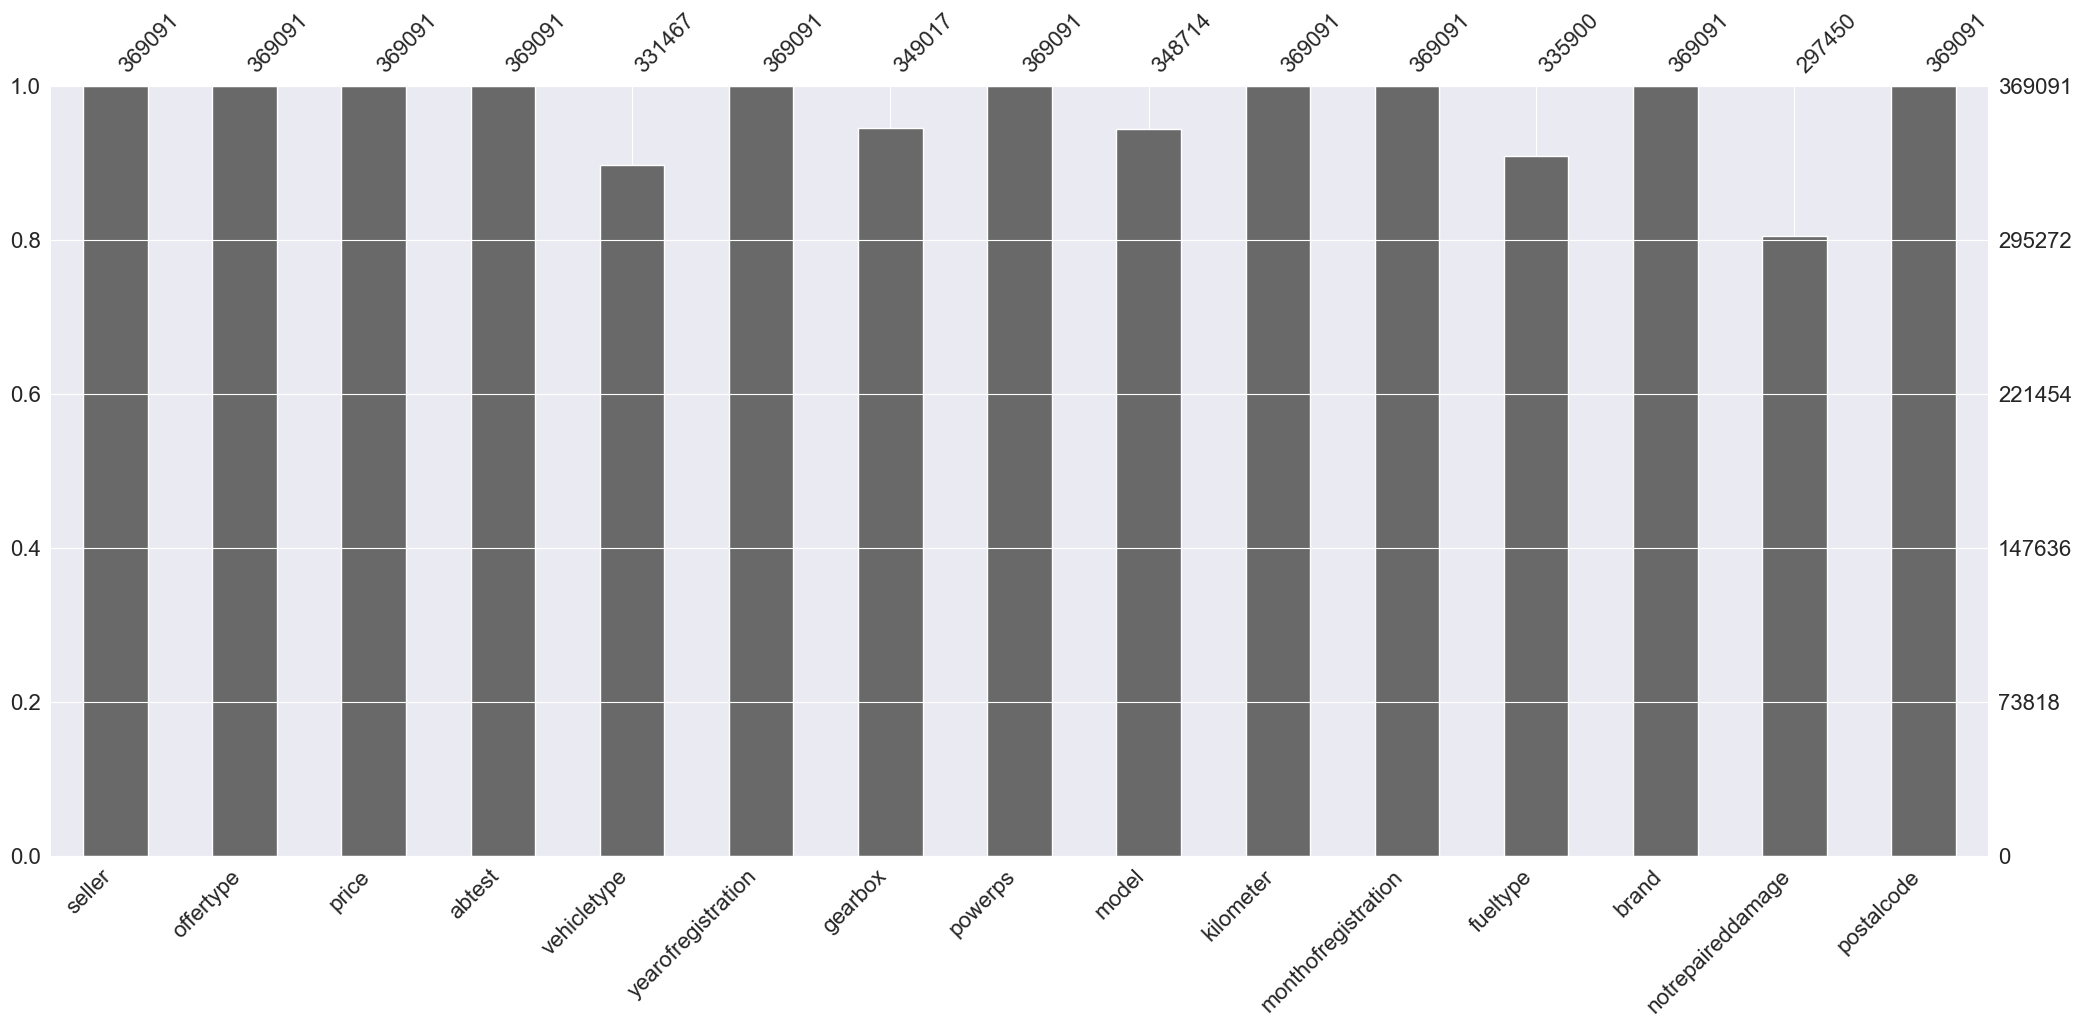

In [24]:
import missingno
missingno.bar(df)

<Axes: >

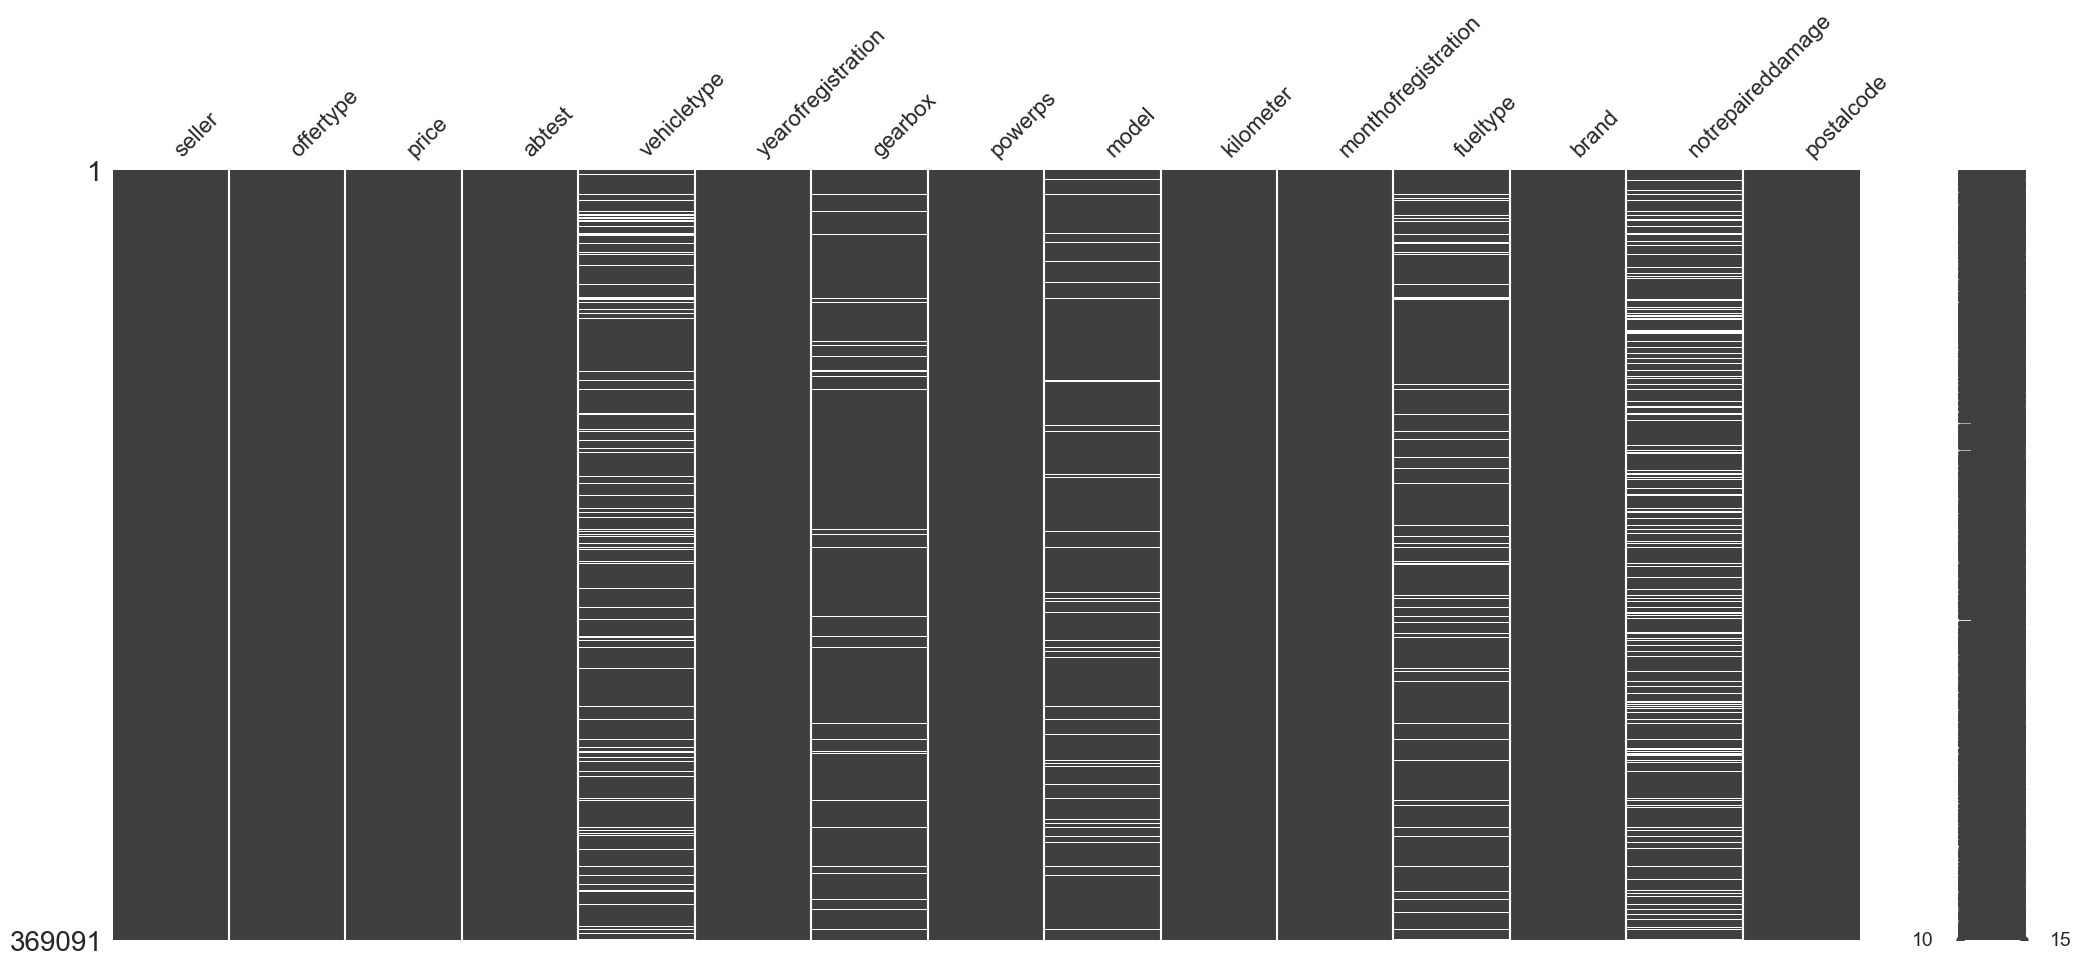

In [25]:
missingno.matrix(df)

In [26]:
# считаем общее количество строк по каждому столбцу
df.count()

seller                 369091
offertype              369091
price                  369091
abtest                 369091
vehicletype            331467
yearofregistration     369091
gearbox                349017
powerps                369091
model                  348714
kilometer              369091
monthofregistration    369091
fueltype               335900
brand                  369091
notrepaireddamage      297450
postalcode             369091
dtype: int64

In [27]:
df.isna().sum()

seller                     0
offertype                  0
price                      0
abtest                     0
vehicletype            37624
yearofregistration         0
gearbox                20074
powerps                    0
model                  20377
kilometer                  0
monthofregistration        0
fueltype               33191
brand                      0
notrepaireddamage      71641
postalcode                 0
dtype: int64

In [28]:
print(len(df))

369091


In [29]:
# по колонкам vehicletype , gearbox , model, fueltype, 'notrepaireddamage' объем пропусков незначителен. Давайте избавимся от пустых строк:

df.dropna(subset=['vehicletype', 'gearbox', 'model', 'fueltype', 'notrepaireddamage'], inplace=True)

In [30]:
print(len(df))

259117


## Продолжаю кодировать переменные

In [31]:
df.head(20)

,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,postalcode
3,privat,Angebot,1500.0,test,kleinwagen,23.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,91074.0
4,privat,Angebot,3600.0,test,kleinwagen,16.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,60437.0
5,privat,Angebot,650.0,test,limousine,29.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,33775.0
6,privat,Angebot,2200.0,test,cabrio,20.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein,67112.0
7,privat,Angebot,0.0,test,limousine,44.0,manuell,50.0,andere,40000.0,7.0,benzin,volkswagen,nein,19348.0
10,privat,Angebot,2000.0,control,limousine,20.0,manuell,105.0,3_reihe,150000.0,12.0,benzin,mazda,nein,96224.0
11,privat,Angebot,2799.0,control,kombi,19.0,manuell,140.0,passat,150000.0,12.0,diesel,volkswagen,ja,57290.0
14,privat,Angebot,17999.0,control,suv,13.0,manuell,190.0,navara,70000.0,3.0,diesel,nissan,nein,4177.0
17,privat,Angebot,1750.0,control,kleinwagen,20.0,automatik,75.0,twingo,150000.0,2.0,benzin,renault,nein,65599.0
18,privat,Angebot,7550.0,test,bus,17.0,manuell,136.0,c_max,150000.0,6.0,diesel,ford,nein,88361.0


In [32]:
df.dtypes

seller                  object
offertype               object
price                  float64
abtest                  object
vehicletype             object
yearofregistration     float64
gearbox                 object
powerps                float64
model                   object
kilometer              float64
monthofregistration    float64
fueltype                object
brand                   object
notrepaireddamage       object
postalcode             float64
dtype: object

In [33]:
# колонка notrepaireddamage предположительно содержит значения ja и nein. Давайте проверим
df['notrepaireddamage'].unique()

array(['nein', 'ja'], dtype=object)

In [34]:
# Давайте перекодируем в 0 и 1

df['notrepaireddamage'] = df['notrepaireddamage'].map({'nein': 0, 'ja': 1})

In [35]:
categorical = ['seller', 'offertype', 'abtest', 'vehicletype', 'gearbox', 'model', 'fueltype' , 'brand' ]

In [36]:
numerical = ['price', 'yearofregistration', 'powerps', 'kilometer', 'monthofregistration', 'postalcode', 'notrepaireddamage']

In [37]:
# считаем общее количество строк по каждому столбцу
df.count()

seller                 259117
offertype              259117
price                  259117
abtest                 259117
vehicletype            259117
yearofregistration     259117
gearbox                259117
powerps                259117
model                  259117
kilometer              259117
monthofregistration    259117
fueltype               259117
brand                  259117
notrepaireddamage      259117
postalcode             259117
dtype: int64

In [38]:
# выводим количество уникальных значений в переменной categorical
for column in categorical:
    unique_counts = df[column].value_counts()
    print(f"Уникальных значений в столбце {column}:\n{unique_counts}\n")

Уникальных значений в столбце seller:
seller
privat        259115
gewerblich         2
Name: count, dtype: int64

Уникальных значений в столбце offertype:
offertype
Angebot    259113
Gesuch          4
Name: count, dtype: int64

Уникальных значений в столбце abtest:
abtest
test       134542
control    124575
Name: count, dtype: int64

Уникальных значений в столбце vehicletype:
vehicletype
limousine     75857
kleinwagen    58775
kombi         53133
bus           24833
cabrio        18337
coupe         14473
suv           11946
andere         1763
Name: count, dtype: int64

Уникальных значений в столбце gearbox:
gearbox
manuell      198762
automatik     60355
Name: count, dtype: int64

Уникальных значений в столбце model:
model
golf               20726
andere             20165
3er                15503
polo                8769
corsa               8218
                   ...  
i3                     5
rangerover             4
samara                 3
serie_3                3
discovery_sport

Мы видим, что колонки seller и offertype однородны по своим уникальным значениям. Можем безопасно избавиться от них


In [39]:
# Удаляем колонки seller и offertype

columns_to_drop_2 = ["seller", "offertype"]
df.drop(columns=columns_to_drop_2, inplace=True)

ЛОГИЧНЕЕ ПРИМЕНИТЬ КОДИРОВАНИЕ:

ONE-HOT-ENCODING: abtest, gearbox

BINARY_ENCODING : brand, model, fueltype, vehicletype

### ONE-HOT-ENCODING

In [40]:
# Применяем кодирование:
cat = ['abtest', 'gearbox']
one_hot = pd.get_dummies(df[cat])
one_hot

,abtest_control,abtest_test,gearbox_automatik,gearbox_manuell
3,False,True,False,True
4,False,True,False,True
5,False,True,False,True
6,False,True,False,True
7,False,True,False,True
...,...,...,...,...
371816,True,False,False,True
371817,True,False,False,True
371820,False,True,True,False
371821,False,True,False,True


In [41]:
print(df.shape[0])
print(df.shape[1])

259117
13


In [42]:
# Заменяем перекодированные колонки новыми:
df = df.drop(['abtest', 'gearbox'], axis=1)
df = pd.concat([df, one_hot], axis=1)

In [43]:
print(df.shape[0])
print(df.shape[1])

259117
15


In [44]:
df.dtypes

price                  float64
vehicletype             object
yearofregistration     float64
powerps                float64
model                   object
kilometer              float64
monthofregistration    float64
fueltype                object
brand                   object
notrepaireddamage        int64
postalcode             float64
abtest_control            bool
abtest_test               bool
gearbox_automatik         bool
gearbox_manuell           bool
dtype: object

### Binary_Encoding

In [45]:
class BinaryEncoder:
    def __init__(self, columns):
        self.columns = columns
        self.binary_mapping = {}

    def fit(self, data):
        for col in self.columns:
            unique_values = data[col].unique()
            binary_repr_len = len(bin(len(unique_values) - 1)[2:])
            self.binary_mapping[col] = {
                value: format(index, '0{}b'.format(binary_repr_len))
                for index, value in enumerate(unique_values)
            }

    def transform(self, data):
        encoded_data = data.copy()
        for col, mapping in self.binary_mapping.items():
            encoded_data[col] = encoded_data[col].map(mapping)
        return encoded_data

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [46]:
Binary_encoder = BinaryEncoder(columns=['brand', 'model', 'fueltype', 'vehicletype'])
encoded_df = Binary_encoder.fit_transform(df)

print(encoded_df)

          price vehicletype  yearofregistration  powerps     model  kilometer  \
3        1500.0         000                23.0     75.0  00000000   150000.0   
4        3600.0         000                16.0     69.0  00000001    90000.0   
5         650.0         001                29.0    102.0  00000010   150000.0   
6        2200.0         010                20.0    109.0  00000011   150000.0   
7           0.0         001                44.0     50.0  00000100    40000.0   
...         ...         ...                 ...      ...       ...        ...   
371816   3200.0         001                20.0    225.0  01101011   150000.0   
371817   1150.0         101                24.0      0.0  01001110   150000.0   
371820   1199.0         010                24.0    101.0  00010111   125000.0   
371821   9200.0         101                28.0    102.0  00001111   150000.0   
371823  28990.0         001                11.0    320.0  10000110    50000.0   

        monthofregistration

In [47]:
# Заменяем перекодированные колонки новыми:
df = df.drop(['brand', 'model', 'fueltype', 'vehicletype'], axis=1)
# df = pd.concat([df, encoded_df], axis=1)

In [48]:
df[['abtest_control', 'abtest_test', 'gearbox_automatik', 'gearbox_manuell']] = df[['abtest_control', 'abtest_test', 'gearbox_automatik', 'gearbox_manuell']].astype(int)

In [49]:
df.dtypes

price                  float64
yearofregistration     float64
powerps                float64
kilometer              float64
monthofregistration    float64
notrepaireddamage        int64
postalcode             float64
abtest_control           int64
abtest_test              int64
gearbox_automatik        int64
gearbox_manuell          int64
dtype: object

## Нормализация целевой переменной

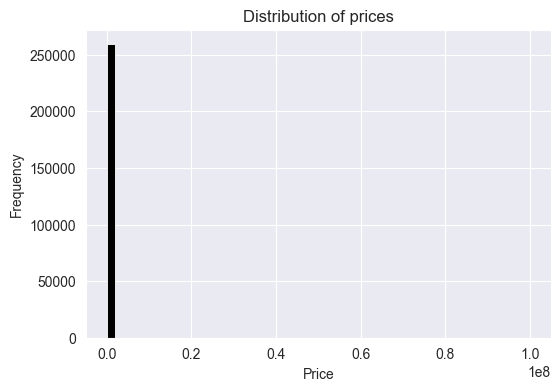

In [50]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

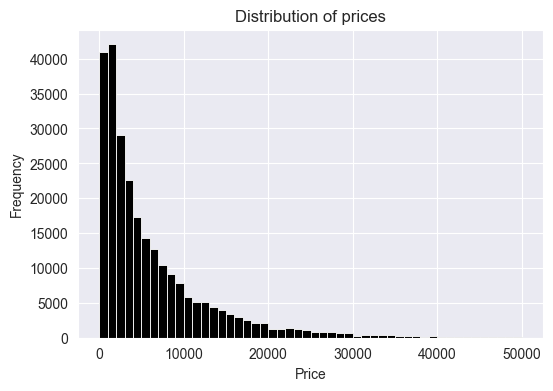

In [51]:
# увеличиваем масштаб и отображаем значения ниже 100.000 долларов
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 50000], bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

Видим эффект длинного хвоста


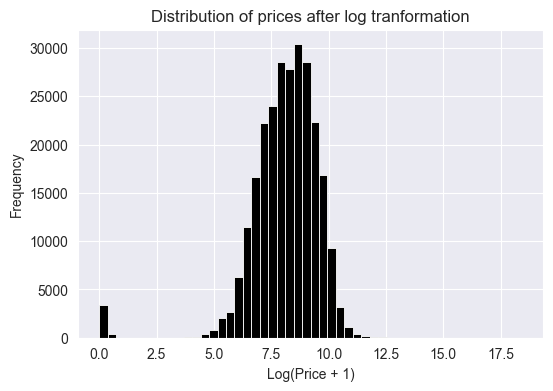

In [52]:
# Применяем логарифмирование цены Ynew = log(y+1), чтобы устранить эффект хвоста --> добиваемся эффекта нормального распределения

log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=50, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [53]:
df.isnull().sum()

price                  0
yearofregistration     0
powerps                0
kilometer              0
monthofregistration    0
notrepaireddamage      0
postalcode             0
abtest_control         0
abtest_test            0
gearbox_automatik      0
gearbox_manuell        0
dtype: int64

In [54]:
print(df['price'])

3          1500.0
4          3600.0
5           650.0
6          2200.0
7             0.0
           ...   
371816     3200.0
371817     1150.0
371820     1199.0
371821     9200.0
371823    28990.0
Name: price, Length: 259117, dtype: float64


## Платформа проверки (Validation Framework)

In [55]:
n = len(df)  # присваиваем к переменной n количество строк в датафрейме

# Разделяем выборку на тестовую, тренировочную и валидационную
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2) # Фиксирует случайное начальное значение, обеспечивая воспроизводимость результатов
idx = np.arange(n) # создаем массив numpy с индексами от 0 до (n-1)
np.random.shuffle(idx) # перетасовываем этот массив

df_shuffled = df.iloc[idx] # Используем массив с индексами для получения перетасованного датафрейма

# Разбиваем перетасованный датафрейм на обучающий, тестовый и валидационный
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [56]:
x_train = df_train.drop(['price'], axis=1)
x_test = df_test.drop(['price'], axis=1)
x_val = df_val.drop(['price'], axis=1)

In [57]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

# Применяем логарифмическое преобразование к целевой переменной для устранения эффекта "длинного хвоста"
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

## Линейная регрессия

In [58]:
def train_linear_regression(X, y): 
    # добавление фиктивного столбца 
    ones = np.ones(X.shape[0]) # создаем массив
    X = np.column_stack([ones, X]) # добавляет массив из единиц 

    # формула нормального уравнения
    XTX = X.T.dot(X) # Вычисляет X^T * X
    XTX_inv = np.linalg.inv(XTX)  # Вычисляет обратную величину X^T * X
    w = XTX_inv.dot(X.T).dot(y) # Вычисляет остальную часть нормального уравнения
    
    return w[0], w[1:]  # Разбивает вектор весов на смещение и остальные веса

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [61]:
# # from sklearn.linear_model import Ridge
# ridge_model = Ridge(alpha=0.5)
# regressor = LinearRegression(ridge_model)
# regressor.fit(x_train, y_train)

In [62]:
y_train_pred = regressor.predict(x_train)

In [63]:
y_train

array([9.62911649, 7.34665516, 8.26873183, ..., 7.20860034, 7.71912984,
       9.51051904])

In [64]:
y_train_pred

array([9.1286364 , 7.33188478, 7.89915065, ..., 7.54683345, 7.41937072,
       8.5671561 ])

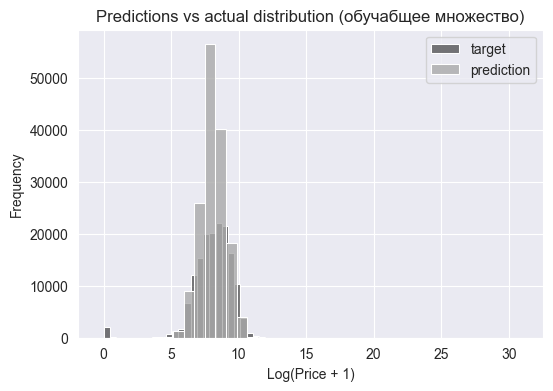

In [65]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (обучабщее множество)')

plt.show()

In [66]:
y_test_pred = regressor.predict(x_test)

In [67]:
y_test

array([7.09090982, 8.22977775, 8.24301947, ..., 8.61086567, 4.61512052,
       6.62140565])

In [68]:
y_test_pred

array([7.7457153 , 8.38077601, 7.41064777, ..., 8.38245521, 7.53624192,
       7.61635451])

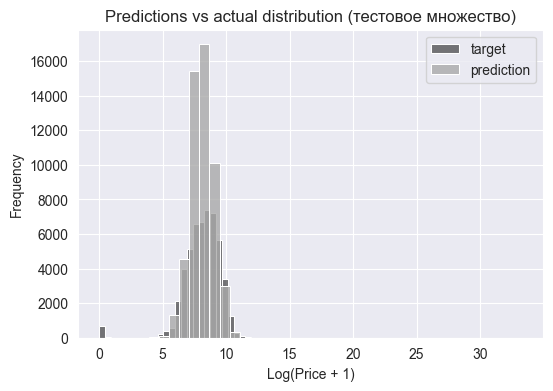

In [69]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (тестовое множество)')

plt.show()

In [70]:
y_val_pred = regressor.predict(x_val)

In [71]:
y_val

array([9.39174484, 8.6226337 , 7.37838371, ..., 8.26898821, 6.85751406,
       8.58503874])

In [72]:
y_val_pred

array([9.31544971, 8.1449784 , 7.45557395, ..., 8.18687277, 7.40160584,
       8.9845713 ])

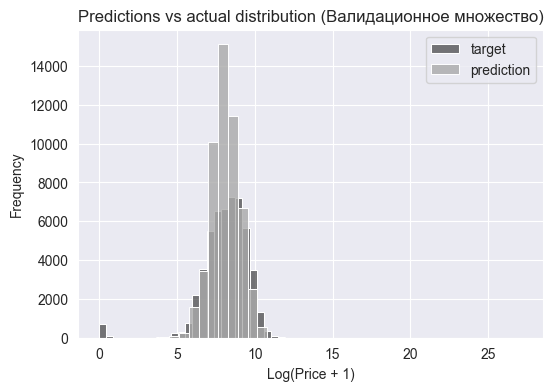

In [73]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (Валидационное множество)')

plt.show()

In [74]:
# Массивы с денормализованными значениями:

y_train_orig_pred= np.expm1(y_train_pred)
y_test_orig_pred = np.expm1(y_test_pred)
y_val_orig_pred = np.expm1(y_val_pred)

### Оцениваем качество модели

In [75]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt

In [76]:
print('RMSE (обучающее, тестовое, валидационное)',
      MSE(y_train, y_train_pred, squared=False),
      MSE(y_test, y_test_pred, squared=False),
      MSE(y_val, y_val_pred, squared=False))

print('MAE (обучающее, тестовое, валидационное)',
      MAE(y_train, y_train_pred),
      MAE(y_test, y_test_pred),
      MAE(y_val, y_val_pred))

print('R2 (обучающее, тестовое, валидационное)',
      R2(y_train, y_train_pred),
      R2(y_test, y_test_pred),
      R2(y_val, y_val_pred))

RMSE (обучающее, тестовое, валидационное) 1.193335862125088 1.1800690130432954 1.1949359494640852
MAE (обучающее, тестовое, валидационное) 0.6742059981902337 0.6686613127669523 0.674511185745848
R2 (обучающее, тестовое, валидационное) 0.3709980159172658 0.3745242923158224 0.38001786677810645


## Decision_tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

In [78]:
# model = DecisionTreeRegressor(random_state=0)
# grid = GridSearchCV(estimator=model,
#                     param_grid={'max_depth':[4,6,8],
#                                 'min_samples_leaf':[2,4,6,8,10],
#                                 'ccp_alpha':[1e11, 5e11, 1e12, 5e12, 1e13]
#                                 })
# grid.fit(x_train, y_train)

In [79]:
# grid.best_params_

In [80]:
model = DecisionTreeRegressor(max_depth=7, #максимальная глубина
                              min_samples_leaf = 2,#минимальная поддержка (минимальное число образцов на листе)
                              # ccp_alpha = 1e11,
                              random_state=1
                              ).fit(x_train,y_train)

In [81]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_val)

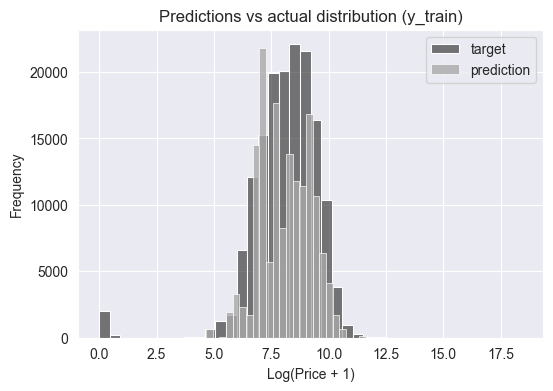

In [82]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_train)')

plt.show()

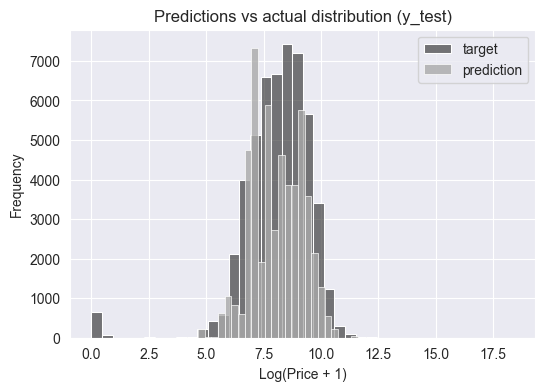

In [83]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_test)')

plt.show()

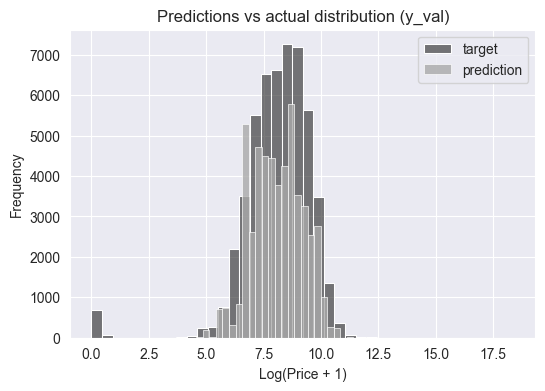

In [84]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_val)')

plt.show()

In [85]:
# Массивы с денормализованными значениями:

y_train_orig_pred= np.expm1(y_train_pred)
y_test_orig_pred = np.expm1(y_test_pred)
y_val_orig_pred = np.expm1(y_val_pred)

### Оценка модели

In [86]:
print('RMSE (обучающее, тестовое, валидационное)',
      MSE(y_train, y_train_pred, squared=False),
      MSE(y_test, y_test_pred, squared=False),
      MSE(y_val, y_val_pred, squared=False))

print('MAE (обучающее, тестовое, валидационное)',
      MAE(y_train, y_train_pred),
      MAE(y_test, y_test_pred),
      MAE(y_val, y_val_pred))

print('R2 (обучающее, тестовое, валидационное)',
      R2(y_train, y_train_pred),
      R2(y_test, y_test_pred),
      R2(y_val, y_val_pred))

RMSE (обучающее, тестовое, валидационное) 1.022289765923242 1.0154514319684051 1.0468898289837576
MAE (обучающее, тестовое, валидационное) 0.505728284946415 0.5042917569732472 0.5118980479503354
R2 (обучающее, тестовое, валидационное) 0.5383905860546823 0.5368582345594592 0.5241261054308344


Модель работает значительно лучше, чем предыдущая (Linear_regression)

## Random_Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
model = RandomForestRegressor(max_depth=12, #максимальная глубина
                              # criterion = "absolute_error",
                              min_samples_leaf = 1, #минимальная поддержка (минимальное число образцов на листе)
                              # ccp_alpha = 1e2,
                              n_estimators = 150, # если будет переобучение, нужно настроить параметры

                            ).fit(x_train, y_train)

In [89]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_val)

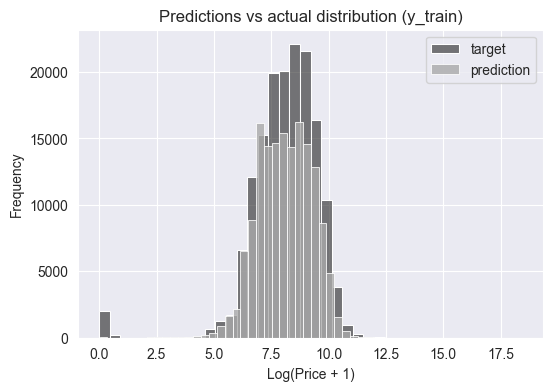

In [90]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_train)')

plt.show()

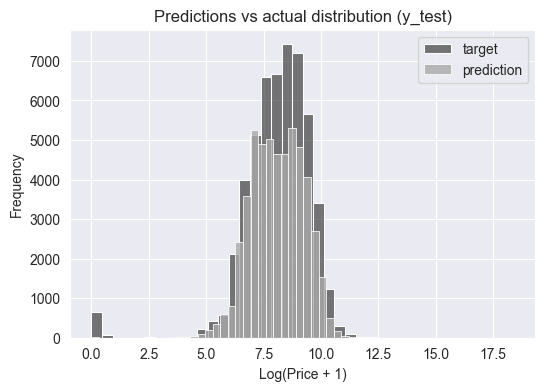

In [91]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_test)')

plt.show()

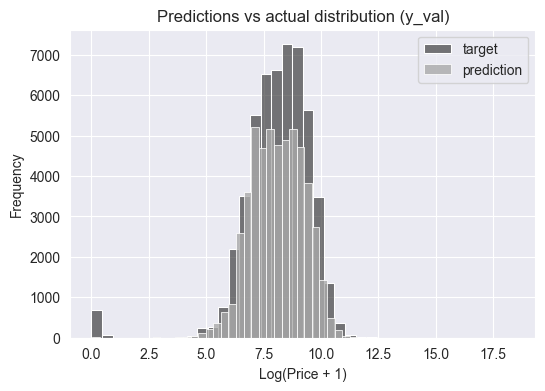

In [92]:
plt.show()
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_val)')

plt.show()

In [93]:
# Массивы с денормализованными значениями:

y_train_orig_pred= np.expm1(y_train_pred)
y_test_orig_pred = np.expm1(y_test_pred)
y_val_orig_pred = np.expm1(y_val_pred)

### Оценка модели

In [94]:
print('RMSE (обучающее, тестовое, валидационное)',
      MSE(y_train, y_train_pred, squared=False),
      MSE(y_test, y_test_pred, squared=False),
      MSE(y_val, y_val_pred, squared=False))

print('MAE (обучающее, тестовое, валидационное)',
      MAE(y_train, y_train_pred),
      MAE(y_test, y_test_pred),
      MAE(y_val, y_val_pred))

print('R2 (обучающее, тестовое, валидационное)',
      R2(y_train, y_train_pred),
      R2(y_test, y_test_pred),
      R2(y_val, y_val_pred))

RMSE (обучающее, тестовое, валидационное) 0.8710136980668831 0.9827537176506039 1.0116216012732469
MAE (обучающее, тестовое, валидационное) 0.4306440370975715 0.4682906517292399 0.47589575900814873
R2 (обучающее, тестовое, валидационное) 0.6648983232349939 0.5662045176710551 0.5556490544106327


Модель улучшила свои показатели

## HistGradientBoosting

In [95]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [96]:
model = HistGradientBoostingRegressor(max_depth=15, #максимальная глубина
                                      min_samples_leaf = 3,#минимальная поддержка (минимальное число образцов на листе)
                                      # n_estimators = 150
                                      #ccp_alpha = 5e11, # если будет переобучение, нужно настроить параметры
                                    ).fit(x_train, y_train)

In [97]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_val)

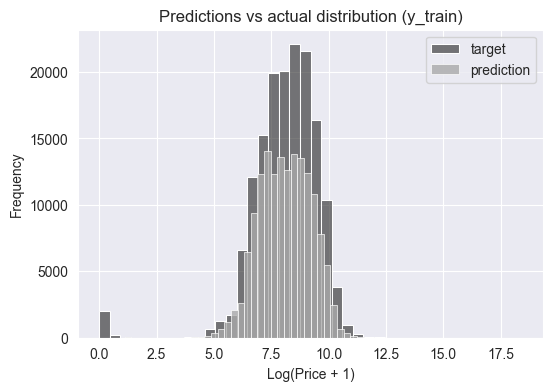

In [98]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_train)')

plt.show()

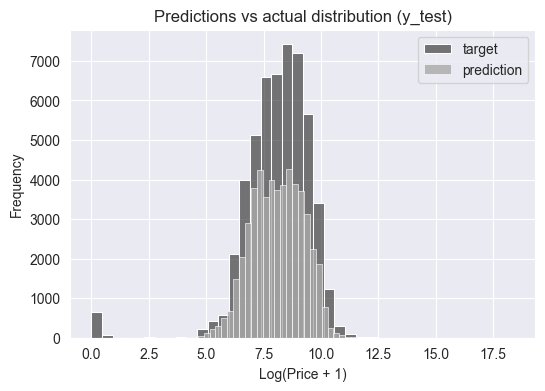

In [99]:
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_test)')

plt.show()

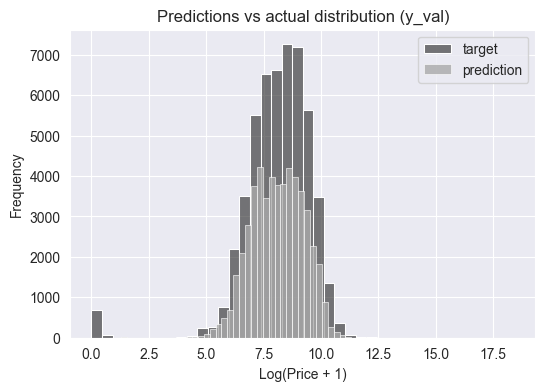

In [100]:
plt.show()
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (y_val)')

plt.show()

In [101]:
# Массивы с денормализованными значениями:

y_train_orig_pred= np.expm1(y_train_pred)
y_test_orig_pred = np.expm1(y_test_pred)
y_val_orig_pred = np.expm1(y_val_pred)

### Оценка модели

In [102]:
print('RMSE (обучающее, тестовое, валидационное)',
      MSE(y_train, y_train_pred, squared=False),
      MSE(y_test, y_test_pred, squared=False),
      MSE(y_val, y_val_pred, squared=False))

print('MAE (обучающее, тестовое, валидационное)',
      MAE(y_train, y_train_pred),
      MAE(y_test, y_test_pred),
      MAE(y_val, y_val_pred))

print('R2 (обучающее, тестовое, валидационное)',
      R2(y_train, y_train_pred),
      R2(y_test, y_test_pred),
      R2(y_val, y_val_pred))

RMSE (обучающее, тестовое, валидационное) 0.9775113100043742 0.9843837711172021 1.0135955066371731
MAE (обучающее, тестовое, валидационное) 0.4675065881922606 0.4686030831890594 0.47673783739162645
R2 (обучающее, тестовое, валидационное) 0.5779438695854757 0.5647642865243161 0.5539133017697822


Модель стала более устойчивой к переобучению, при том, что значения функции ошибок на валидационном множестве незначительно ухудшились по сравнению с моделью Random_forest

## Нейронная сеть MLP

In [103]:
input = df.drop(columns = 'price')
output = np.log1p(df[['price']])
print(input)
print(output)

        yearofregistration  powerps  kilometer  monthofregistration  \
3                     23.0     75.0   150000.0                  6.0   
4                     16.0     69.0    90000.0                  7.0   
5                     29.0    102.0   150000.0                 10.0   
6                     20.0    109.0   150000.0                  8.0   
7                     44.0     50.0    40000.0                  7.0   
...                    ...      ...        ...                  ...   
371816                20.0    225.0   150000.0                  5.0   
371817                24.0      0.0   150000.0                  3.0   
371820                24.0    101.0   125000.0                  3.0   
371821                28.0    102.0   150000.0                  3.0   
371823                11.0    320.0    50000.0                  8.0   

        notrepaireddamage  postalcode  abtest_control  abtest_test  \
3                       0     91074.0               0            1   
4      

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input.to_numpy(),
                                                    output.to_numpy(),
                                                    test_size=0.2)

### Нормализация данных

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Создаем объект MinMaxScaler для масштабирования признаков
scaler_x = MinMaxScaler().fit(x_train)
x_train_norm = scaler_x.transform(x_train)
x_test_norm = scaler_x.transform(x_test)

# # Преобразуем целевые переменные в двумерный массив
# y_train_reshaped = y_train_orig.reshape(-1, 1)
# y_test_reshaped = y_test_orig.reshape(-1, 1)
# y_val_reshaped = y_val_orig.reshape(-1, 1)

# Создаем объект MinMaxScaler для масштабирования целевых переменных
scaler_y = MinMaxScaler().fit(y_train)
y_train_norm = scaler_y.transform(y_train)
y_test_norm = scaler_y.transform(y_test)
# y_train_norm = scaler_y.transform(np.log(y_train))
# y_test_norm = scaler_y.transform(np.log(y_test))

### Обучение

In [107]:
from sklearn.neural_network import MLPRegressor

In [108]:
neural = MLPRegressor(hidden_layer_sizes=(100,50), # 100 - количество нейронов в скрытом слое
                      activation ='relu',  # активационная функция
                      solver = 'adam', #алгоритм обучения
                      #tol=0.000001, # критерий остановки / предел ошибки
                      max_iter = 50, # максимальное число эпох
                      verbose = True).fit(x_train_norm, y_train_norm)

Iteration 1, loss = 0.00217608
Iteration 2, loss = 0.00184743
Iteration 3, loss = 0.00175578
Iteration 4, loss = 0.00169738
Iteration 5, loss = 0.00166124
Iteration 6, loss = 0.00163812
Iteration 7, loss = 0.00163967
Iteration 8, loss = 0.00161954
Iteration 9, loss = 0.00162152
Iteration 10, loss = 0.00160872
Iteration 11, loss = 0.00161011
Iteration 12, loss = 0.00160262
Iteration 13, loss = 0.00160133
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [109]:
predict_train_norm = neural.predict(x_train_norm)
predict_test_norm = neural.predict(x_test_norm)

In [110]:
predict_train = scaler_y.inverse_transform(predict_train_norm.reshape(-1,1))
predict_test = scaler_y.inverse_transform(predict_test_norm.reshape(-1,1))


In [111]:
# Массивы с денормализованными значениями:

y_train_orig_pred = np.expm1(y_train_pred)
y_test_orig_pred = np.expm1(y_test_pred)
# y_val_orig_pred = np.expm1(y_val_pred)

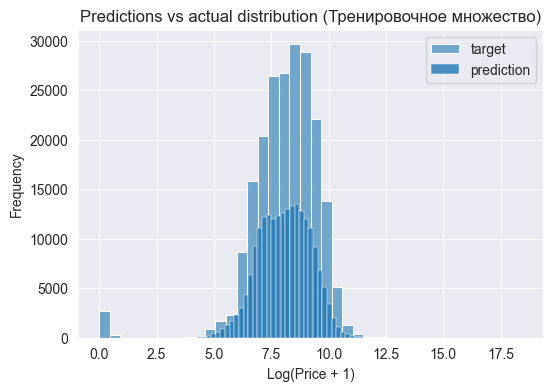

In [112]:
plt.show()
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(predict_train, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (Тренировочное множество)')

plt.show()

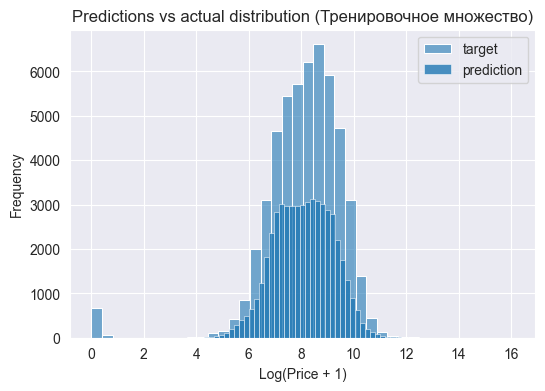

In [113]:
plt.show()
# Прогнозы в сравнении с фактическим распределением
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(predict_test, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (Тренировочное множество)')

plt.show()

### Оценка модели

In [114]:
print('RMSE (обучающее, тестовое)',
      MSE(y_train, predict_train, squared=False),
      MSE(y_test, predict_test, squared=False))

print('MAE (обучающее, тестовое)',
      MAE(y_train, predict_train),
      MAE(y_test, predict_test))

print('R2 (обучающее, тестовое)',
      R2(y_train, predict_train),
      R2(y_test, predict_test))

RMSE (обучающее, тестовое) 1.0241743686714297 1.0209455545375985
MAE (обучающее, тестовое) 0.5058050620877108 0.5068389535142707
R2 (обучающее, тестовое) 0.5372722543558304 0.5375629384099817
